___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice
import numpy as np

## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

<Container object of 6 artists>

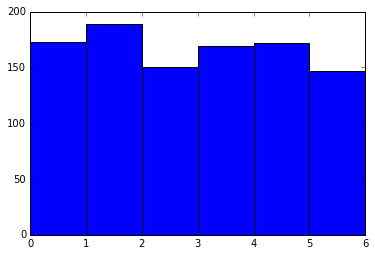

In [6]:
def dice_roll(number):
    counts = [0] * 6
    for i in range(number):
        roll = randint(1,7)
        counts[roll - 1] += 1
    return counts

n = 1000
dr = dice_roll(n)

pos = np.arange(len(dr))
width = 1.0

plt.bar(pos, dr, width)

## a)
Em relação a probabilidade de cada face pode-se dizer que são muito próximas, visto que no histograma acima todos as colunas tem um número muito semelhante de ocorrências.

## b)
A probabilidade prática de todas as ocorrências de cada face ser igual a probabilidade teórica não é provavável, uma vez que a queda teórica representa uma probabilidade e não uma certeza, indicando que o número de ocorrências de cada face do dado se assemelhará à teórica.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

<Container object of 12 artists>

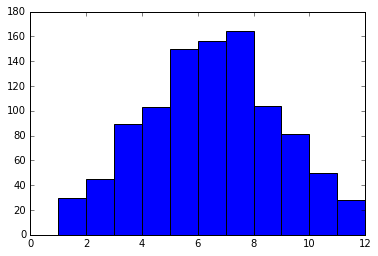

In [72]:
def two_dice(number):
    counts = [0] * 12
    for i in range(number):
        roll1 = randint(1,7)
        roll2 = randint(1,7)
        counts[(roll1+roll2)-1] += 1
    return counts

n = 1000
td = two_dice(n)

pos = np.arange(len(td))
width = 1.0

plt.bar(pos, td, width)

In [116]:
for i in range(1,12):
    print("Número de ocorrências da soma {0}:".format(i+1))
    print(td[i])

Número de ocorrências da soma 2:
30
Número de ocorrências da soma 3:
45
Número de ocorrências da soma 4:
89
Número de ocorrências da soma 5:
103
Número de ocorrências da soma 6:
150
Número de ocorrências da soma 7:
156
Número de ocorrências da soma 8:
164
Número de ocorrências da soma 9:
104
Número de ocorrências da soma 10:
81
Número de ocorrências da soma 11:
50
Número de ocorrências da soma 12:
28


## a)

In [74]:
# Probabilidade de se obter a soma 7

P = (td[6]/1000)*100
print("Probabilidade de se obter a soma 7 é de {0}%.".format(P))

Probabilidade de se obter a soma 7 é de 15.6%.


## b)
A probabilidade da soma dos dados reslutar em 7 é igual a, aproximadamente, 16.7%, uma vez que já conhecendo a face do primeiro dado haverá sempre apens um número, entre seis, que somado à primeira face resultará na soma 7. Perceb-se que essa probabilidade se deu muito próxima da probabilidade calculada no item anterior, pois o resultado do fenômeno aleatório do segundo evento é independente do resultado do primeiro evento.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [113]:
def Monty_Hall(games):
    doors = ["cabra","cabra","carro"]
    g_wins = 0
    g_loses = 0

    for i in range(games):
        shuffle(doors)
        n = choice(doors)
        sequence = [0,1,2]
        shuffle(sequence)
        for k in sequence:
            if doors[k] == n or doors[k] == "carro":
                continue
        if n == "carro":
            g_loses += 1
        else:
            g_wins += 1
    return(g_wins,g_loses)

games = 10000
MH = Monty_Hall(games)

print("Ao trocar de porta obteve-se {0} vitórias, em oposição à {1} derrotas.\n".format(MH[0], MH[1]))
print("A porcentagem de vitórias foi de {0}%.".format(100 * (MH[0]/10000)))
print("A porcentagem de derrotas foi de {0}%.".format(100 * (MH[1]/10000)))

Ao trocar de porta obteve-se 6656 vitórias, em oposição à 3344 derrotas.

A porcentagem de vitórias foi de 66.56%.
A porcentagem de derrotas foi de 33.44%.
